In [578]:
import mlrose_hiive as mlrose
import numpy as np
import pandas as pd
random_state = 75
import matplotlib.pyplot as plt

In [557]:
df = pd.read_csv('/Users/baptistecarbillet/Documents/MachineLearning1/winequality-white.csv',sep=';')
df['y'] = df['quality'].apply(lambda x: 1 if x >= 6 else 0)
df = df.drop('quality',axis=1)

X,y = np.array(df.drop('y',axis=1)),np.array(df['y'])

#Normalize X
X = (X - np.mean(X,axis=0))/np.std(X,axis=0)

from sklearn.model_selection import train_test_split

random_state = 75 #Paris

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=random_state)

X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=random_state)




0.6651694569211923

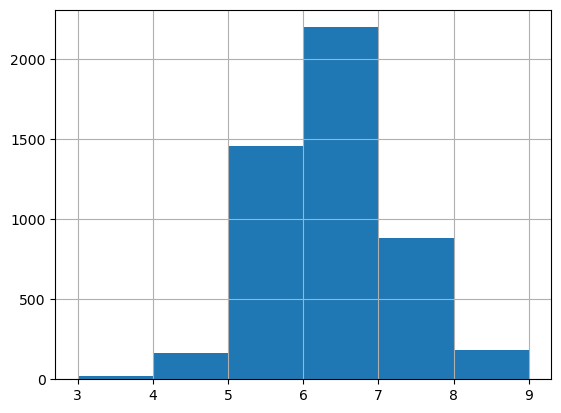

In [756]:
df = pd.read_csv('/Users/baptistecarbillet/Documents/MachineLearning1/winequality-white.csv',sep=';')
#count number of values in quality by unique values
df['quality'].hist(bins=6)
df['quality'].median()
#number of wine with quality greater than 6
df[df['quality']>=6].shape[0]/df.shape[0]


## backpropagation

In [799]:
nn_backprogation = mlrose.NeuralNetwork(hidden_nodes = [64], activation = 'sigmoid', \
                                 algorithm = 'gradient_descent',  \
                                 bias = True, is_classifier = True, learning_rate = 0.01, \
                                 early_stopping = True, clip_max = 1e8, max_attempts = 10, max_iters= 400, \
                                 random_state = 75,curve=True)

In [800]:
nn_backprogation.fit(X_train,y_train)

NeuralNetwork(activation='sigmoid', algorithm='gradient_descent',
              clip_max=100000000.0, curve=True, early_stopping=True,
              hidden_nodes=[64], learning_rate=0.01, max_iters=400,
              random_state=75)

In [762]:
train_loss_bp = []
val_loss_bp = []

train_acc_bp = []
val_acc_bp = []

for i in range(1,400,5):
    nn_backprogation = mlrose.NeuralNetwork(hidden_nodes = [64], activation = 'sigmoid', \
                                 algorithm = 'gradient_descent',  \
                                 bias = True, is_classifier = True, learning_rate = 0.01, \
                                 early_stopping = True, clip_max = 1e8, max_attempts = 10, max_iters= i, \
                                 random_state = 75,curve=True)
    nn_backprogation.fit(X_train,y_train)
    train_loss_bp.append(nn_backprogation.fitness_curve[-1])
    val_loss_bp.append(nn_backprogation.score(X_val,y_val))
    
    y_pred_train = nn_backprogation.predict(X_train)
    y_pred = nn_backprogation.predict(X_val)
    train_acc_bp.append(accuracy_score(y_train,y_pred_train))
    val_acc_bp.append(accuracy_score(y_val,y_pred))

In [780]:
val_acc_bp

[0.514030612244898,
 0.514030612244898,
 0.5676020408163265,
 0.7028061224489796,
 0.7028061224489796,
 0.7053571428571429,
 0.7053571428571429,
 0.7053571428571429,
 0.7053571428571429,
 0.7295918367346939,
 0.7295918367346939,
 0.7295918367346939,
 0.7295918367346939,
 0.7295918367346939,
 0.7295918367346939,
 0.7295918367346939,
 0.7295918367346939,
 0.7295918367346939,
 0.7295918367346939,
 0.7232142857142857,
 0.7232142857142857,
 0.7232142857142857,
 0.7295918367346939,
 0.7295918367346939,
 0.7321428571428571,
 0.7321428571428571,
 0.7219387755102041,
 0.7219387755102041,
 0.7385204081632653,
 0.7385204081632653,
 0.7385204081632653,
 0.7385204081632653,
 0.7385204081632653,
 0.7385204081632653,
 0.7474489795918368,
 0.7474489795918368,
 0.7474489795918368,
 0.7474489795918368,
 0.7474489795918368,
 0.7474489795918368,
 0.7474489795918368,
 0.7474489795918368,
 0.7474489795918368,
 0.7474489795918368,
 0.7474489795918368,
 0.7448979591836735,
 0.7448979591836735,
 0.744897959183

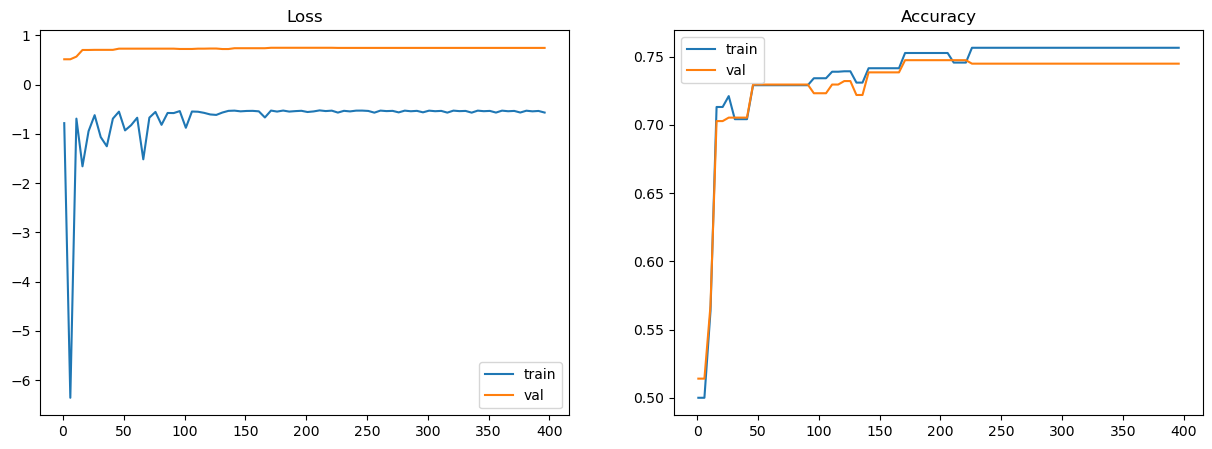

In [778]:
#plot loss and accuracy on two graph
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot([i for i in range(1,400,5)],train_loss_bp,label='train')
ax[0].plot([i for i in range(1,400,5)],val_loss_bp,label='val')
ax[0].set_title('Loss')
#
#squeech y axis

ax[0].legend()
ax[1].plot([i for i in range(1,400,5)],train_acc_bp,label='train')
ax[1].plot([i for i in range(1,400,5)],val_acc_bp,label='val')
ax[1].set_title('Accuracy')
ax[1].legend()



In [771]:
train_acc_lc_bp = []
val_acc_lc_bp = []


for sample in np.linspace(0.01,0.99,50):
    
    X_train_sample,X_out_sample,y_train_sample,y_out_sample = train_test_split(X_train,y_train,test_size=float(1 - sample),random_state=random_state)
    
    nn_bp_lc = mlrose.NeuralNetwork(hidden_nodes = [64], activation = 'sigmoid', \
                                 algorithm = 'gradient_descent',  \
                                 bias = True, is_classifier = True, learning_rate = 0.01, \
                                 early_stopping = True, clip_max = 1e8, max_attempts = 10, max_iters= 230, \
                                 random_state = 75,curve=True)
    nn_bp_lc.fit(X_train_sample,y_train_sample)
    y_pred_train = nn_bp_lc.predict(X_train_sample)
    train_acc_lc_bp.append(accuracy_score(y_train_sample,y_pred_train))
    val_acc_lc_bp.append(accuracy_score(y_val,nn_bp_lc.predict(X_val)))
    

In [782]:
X_train.shape,X_val.shape,X_test.shape

((3134, 11), (784, 11), (980, 11))

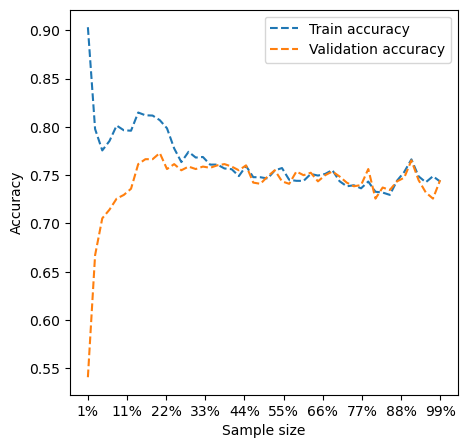

In [774]:
fig, ax = plt.subplots(figsize=(5,5))

ax.plot(np.linspace(0.01,0.99,50),train_acc_lc_bp,label='Train accuracy',linestyle='--')
##With dashed line

ax.plot(np.linspace(0.01,0.99,50),val_acc_lc_bp,label='Validation accuracy',linestyle='--')

ax.set_xlabel('Sample size')
ax.set_ylabel('Accuracy')
#x_tick as percentage
ax.set_xticks(np.linspace(0.01,0.99,10))
ax.set_xticklabels([str(int(i*100))+'%' for i in np.linspace(0.01,0.99,10)])
ax.legend()

plt.show()

Test score

In [876]:
nn_bp = mlrose.NeuralNetwork(hidden_nodes = [64], activation = 'sigmoid', \
                                 algorithm = 'gradient_descent',  \
                                 bias = True, is_classifier = True, learning_rate = 0.01, \
                                 early_stopping = True, clip_max = 1e8, max_attempts = 10, max_iters= 400, \
                                 random_state = 75,curve=True)
nn_bp.fit(X_train,y_train)

#score on test set
y_pred = nn_bp.predict(X_test)
accuracy_score(y_test,y_pred)

0.7551020408163265

In [ ]:
X_train_sample,X_out_sample,y_train_sample,y_out_sample = train_test_split(X_train,y_train,test_size=float(1 - sample),random_state=random_state)
    
    nn_bp_lc = mlrose.NeuralNetwork(hidden_nodes = [64], activation = 'sigmoid', \
                                 algorithm = 'gradient_descent',  \
                                 bias = True, is_classifier = True, learning_rate = 0.01, \
                                 early_stopping = True, clip_max = 1e8, max_attempts = 10, max_iters= 230, \
                                 random_state = 75,curve=True)
    nn_bp_lc.fit(X_train_sample,y_train_sample)

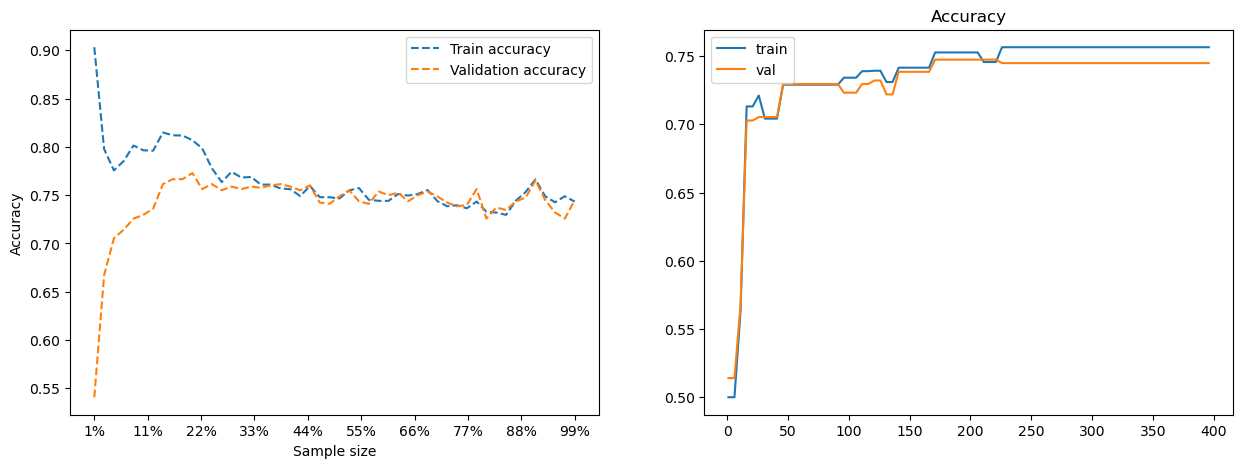

In [779]:
#plot learning curve and accuracy train/val on two graph
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(np.linspace(0.01,0.99,50),train_acc_lc_bp,label='Train accuracy',linestyle='--')
##With dashed line

ax[0].plot(np.linspace(0.01,0.99,50),val_acc_lc_bp,label='Validation accuracy',linestyle='--')

ax[0].set_xlabel('Sample size')
ax[0].set_ylabel('Accuracy')
#x_tick as percentage
ax[0].set_xticks(np.linspace(0.01,0.99,10))
ax[0].set_xticklabels([str(int(i*100))+'%' for i in np.linspace(0.01,0.99,10)])
ax[0].legend()


##With dashed line

ax[1].plot([i for i in range(1,400,5)],train_acc_bp,label='train')
ax[1].plot([i for i in range(1,400,5)],val_acc_bp,label='val')
ax[1].set_title('Accuracy')
ax[1].legend()


In [597]:
y_pred_train = nn_backprogation.predict(X_train)
y_pred = nn_backprogation.predict(X_test)

from sklearn.metrics import accuracy_score,f1_score

print('Train Accuracy and F1: ',accuracy_score(y_train,y_pred_train),f1_score(y_train,y_pred_train))
print('Val  Accuracy and F1 : ',accuracy_score(y_test,y_pred),f1_score(y_test,y_pred))

Train Accuracy and F1:  0.7565411614550096 0.8232568913597405
Val  Accuracy and F1 :  0.7551020408163265 0.8216939078751857


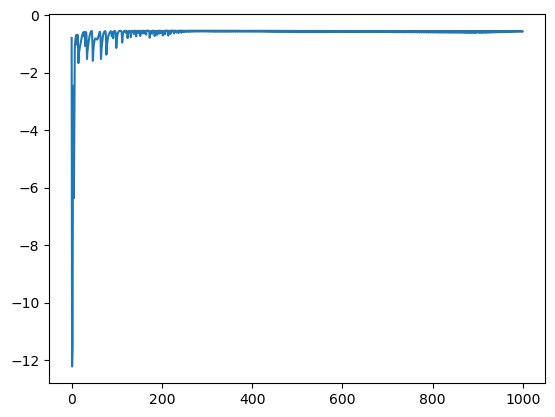

In [586]:
plt.plot(nn_backprogation.fitness_curve)


## RHC Grid search

In [603]:

grid= {
    "max_iters": [10, 20, 50,100,200,1000,2000],
    "max_attempts": [10,30],
    "learning_rate_init": [0.01, 0.1, 1],
    "hidden_layer_sizes":  [[64]], 
    "activation": [mlrose.sigmoid],
    "restarts": [0,1,3,5,10],
    "is_classifier": [True],
}



runner = mlrose.NNGSRunner(x_train=X_train, y_train=y_train,x_test=X_val, y_test=y_val,
                           experiment_name="nn_test", output_directory="nn_test/",
                           algorithm=mlrose.algorithms.simulated_annealing,
                           grid_search_parameters=grid,
                           iteration_list = [10, 20, 50,100,200,1000,2000],
                           
                           bias=True,
                           early_stopping=True,
                           clip_max= 1e8,
                           
                           generate_curves=True,
                           seed= 75,
                           n_jobs=-1,
                           cv = 2,
                           grid_search_scorer_method=accuracy_score)


              
run_stats_rhc, curves_rhc, cv_results_rhc, best_est_rhc = runner.run()

Fitting 2 folds for each of 210 candidates, totalling 420 fits


In [606]:
best_est_rhc.best_params_,best_est_rhc.best_score_

({'activation': <function mlrose_hiive.neural.activation.sigmoid.sigmoid(x, deriv=False)>,
  'hidden_layer_sizes': [64],
  'is_classifier': True,
  'learning_rate_init': 1,
  'max_attempts': 10,
  'max_iters': 2000,
  'restarts': 0},
 0.7386726228462029)

In [873]:
nn_rhc = mlrose.NeuralNetwork(hidden_nodes = [64], activation = 'sigmoid', \
                                 algorithm = 'random_hill_climb',  \
                                 bias = True, is_classifier = True, learning_rate = 1, \
                                 early_stopping = True, clip_max = 1e8, max_attempts = 10, max_iters= 250, \
                                 random_state = 75,curve=True)
start_time = time.time()
nn_rhc.fit(X_train,y_train)
print("--- %s seconds ---" % (time.time() - start_time))
#val accuracy

y_pred_train = nn_rhc.predict(X_train)
y_pred = nn_rhc.predict(X_val)

print('Train Accuracy and F1: ',accuracy_score(y_train,y_pred_train),f1_score(y_train,y_pred_train))
print('Val  Accuracy and F1 : ',accuracy_score(y_val,y_pred),f1_score(y_val,y_pred))

--- 2.4726569652557373 seconds ---
Train Accuracy and F1:  0.753988513082323 0.8283233132932531
Val  Accuracy and F1 :  0.735969387755102 0.8140161725067386


In [874]:
#Score on test set
y_pred = nn_rhc.predict(X_test)
print('Test Accuracy and F1 : ',accuracy_score(y_test,y_pred),f1_score(y_test,y_pred))

Test Accuracy and F1 :  0.7540816326530613 0.8284697508896797


In [795]:
train_acc = []
val_acc = []

for i in range(0,400,40):

    nn_rhc = mlrose.NeuralNetwork(hidden_nodes = [64], activation = 'sigmoid', \
                                 algorithm = 'random_hill_climb',  \
                                 bias = True, is_classifier = True, learning_rate = 0.1, \
                                 early_stopping = True, clip_max = 1e8, max_attempts = 10, max_iters= i, \
                                 random_state = 75,curve=True)
    nn_rhc.fit(X_train,y_train)
    y_pred_train = nn_rhc.predict(X_train)
    y_pred = nn_rhc.predict(X_val)
    train_acc.append(accuracy_score(y_train,y_pred_train))
    val_acc.append(accuracy_score(y_val,y_pred))

Fitness by iteration.

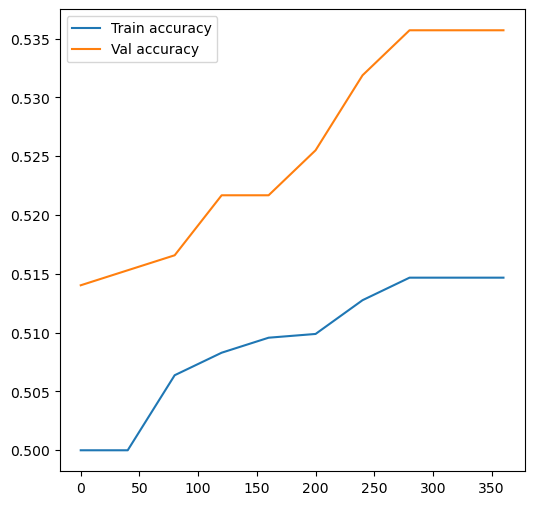

In [794]:
fig, ax = plt.figure(figsize=(6,6)),plt.axes()
ax.plot([i for i in range(0,400,40)],train_acc,label='Train accuracy')
ax.plot([i for i in range(0,400,40)],val_acc,label='Val accuracy')
ax.legend()

## Learning curve

In [789]:
train_acc_lc_rhc = []
val_acc_lc_rhc = []


for sample in np.linspace(0.01,0.99,50):
    X_train_sample,X_out_sample,y_train_sample,y_out_sample = train_test_split(X_train,y_train,test_size=float(1 - sample),random_state=random_state)
    
    nn_rhc_lc = mlrose.NeuralNetwork(hidden_nodes = [64], activation = 'sigmoid', \
                                 algorithm = 'random_hill_climb',  \
                                 bias = True, is_classifier = True, learning_rate = 1, \
                                 early_stopping = True, clip_max = 1e8, max_attempts = 10, max_iters= 400, \
                                 random_state = 75,curve=True)
    nn_rhc_lc.fit(X_train_sample,y_train_sample)
    
    y_pred_train = nn_rhc_lc.predict(X_train_sample)
    train_acc_lc_rhc.append(accuracy_score(y_train_sample,y_pred_train))
    val_acc_lc_rhc.append(accuracy_score(y_val,nn_rhc_lc.predict(X_val)))
    
    
    

In [787]:
len(train_acc_lc_rhc)

100

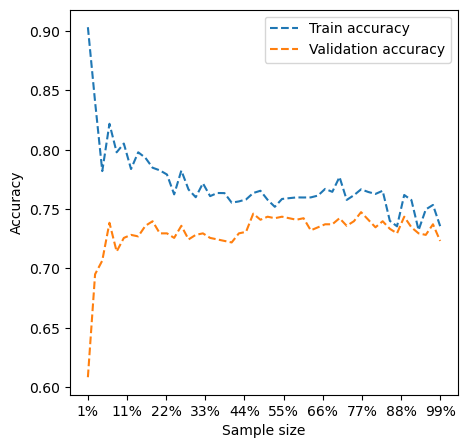

In [790]:
fig, ax = plt.subplots(figsize=(5,5))

ax.plot(np.linspace(0.01,0.99,50),train_acc_lc_rhc,label='Train accuracy',linestyle='--')
##With dashed line

ax.plot(np.linspace(0.01,0.99,50),val_acc_lc_rhc,label='Validation accuracy',linestyle='--')

ax.set_xlabel('Sample size')
ax.set_ylabel('Accuracy')
#x_tick as percentage
ax.set_xticks(np.linspace(0.01,0.99,10))
ax.set_xticklabels([str(int(i*100))+'%' for i in np.linspace(0.01,0.99,10)])
ax.legend()

plt.show()

Text(0.5, 1.0, 'Learning curve')

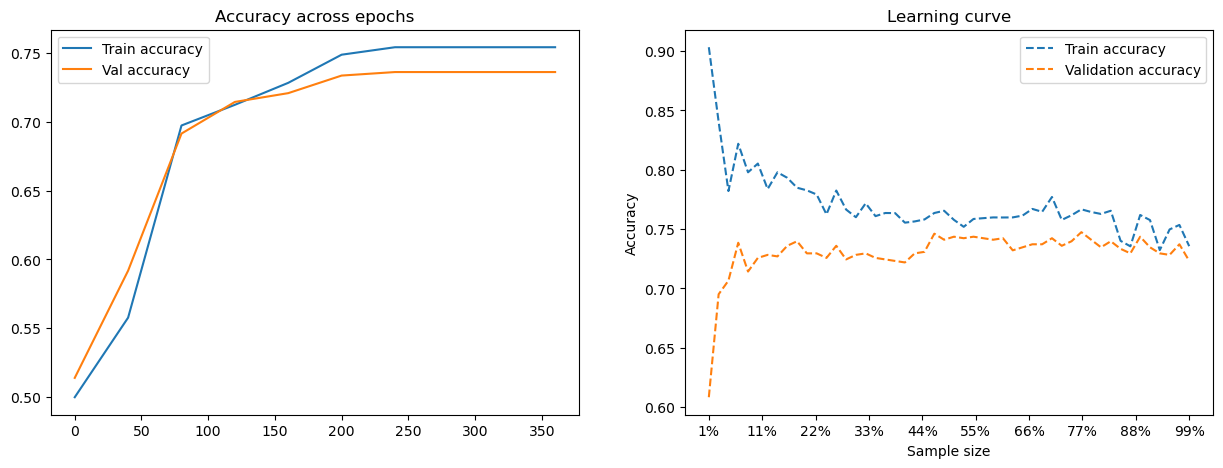

In [792]:
fig, ax = plt.subplots(1,2,figsize=(15,5))

ax[0].plot([i for i in range(0,400,40)],train_acc,label='Train accuracy')
ax[0].plot([i for i in range(0,400,40)],val_acc,label='Val accuracy')
ax[0].legend()
ax[0].set_title('Accuracy across epochs')

ax[1].plot(np.linspace(0.01,0.99,50),train_acc_lc_rhc,label='Train accuracy',linestyle='--')
##With dashed line

ax[1].plot(np.linspace(0.01,0.99,50),val_acc_lc_rhc,label='Validation accuracy',linestyle='--')

ax[1].set_xlabel('Sample size')
ax[1].set_ylabel('Accuracy')
#x_tick as percentage
ax[1].set_xticks(np.linspace(0.01,0.99,10))
ax[1].set_xticklabels([str(int(i*100))+'%' for i in np.linspace(0.01,0.99,10)])
ax[1].legend()
ax[1].set_title('Learning curve')


## SA grid search

In [716]:
decay_geom = [0.9,0.99,0.999]
decay_exp = [5e-5,5e-4,5e-3,5e-2,5e-1]

grid= {
    "max_iters": [10, 20, 50,100,200,400,1000],
    "max_attempt": [10,30],
    "learning_rate_init": [0.01, 0.1, 1],
    "hidden_layer_sizes":  [[64]], 
    "activation": [mlrose.sigmoid],
    "decay_schedule": [mlrose.ExpDecay(init_temp=1,exp_const=c) for c in decay_exp] + [mlrose.GeomDecay(init_temp=1,decay=c) for c in decay_geom] + [mlrose.ArithDecay(init_temp=1)],
    "is_classifier": [True],
}



runner = mlrose.NNGSRunner(x_train=X_train, y_train=y_train,x_test=X_val, y_test=y_val,
                           experiment_name="nn_test", output_directory="nn_test/",
                           algorithm=mlrose.algorithms.simulated_annealing,
                           grid_search_parameters=grid,
                           iteration_list = [10, 20, 50,100],
                           
                           bias=True,
                           early_stopping=True,
                           clip_max= 100,
                           max_attempts=100,
                           generate_curves=True,
                           seed= 75,
                           n_jobs=-1,
                           cv = 2,
                           grid_search_scorer_method=accuracy_score)


              
run_stats_sa, curves_sa, cv_results_sa, best_est_sa = runner.run()

Fitting 2 folds for each of 378 candidates, totalling 756 fits


In [678]:
best_est_sa.best_params_,best_est_sa.best_score_

({'activation': <function mlrose_hiive.neural.activation.sigmoid.sigmoid(x, deriv=False)>,
  'decay_schedule': ExpDecay(init_temp=1, exp_const=5e-05, min_temp=0.001),
  'hidden_layer_sizes': [64],
  'is_classifier': True,
  'learning_rate_init': 1,
  'max_attempt': 10,
  'max_iters': 400},
 0.6541161455009572)

(0, 0)

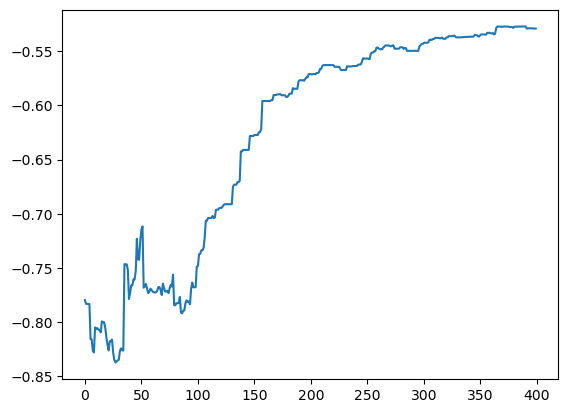

In [869]:
schedule = mlrose.ExpDecay(init_temp=1,exp_const=5e-2)
nn_sa = mlrose.NeuralNetwork(hidden_nodes = [64], activation = 'sigmoid', \
                                 algorithm = 'simulated_annealing',  \
                                 bias = True, is_classifier = True, learning_rate = 1, \
                                 early_stopping = True, clip_max = 1e8, max_attempts = 10, max_iters= 400, \
                                 random_state = 75,curve=True, schedule=    schedule)

nn_sa.fit(X_train,y_train)
plt.plot(-nn_sa.fitness_curve[:,0])

In [870]:
y_pred = nn_sa.predict(X_val)
y_pred_train = nn_sa.predict(X_train)

print('Train Accuracy and F1: ',accuracy_score(y_train,y_pred_train),f1_score(y_train,y_pred_train))
print('Val  Accuracy and F1 : ',accuracy_score(y_val,y_pred),f1_score(y_val,y_pred))

Train Accuracy and F1:  0.7373962986598596 0.809181544168792
Val  Accuracy and F1 :  0.7410714285714286 0.8111627906976744


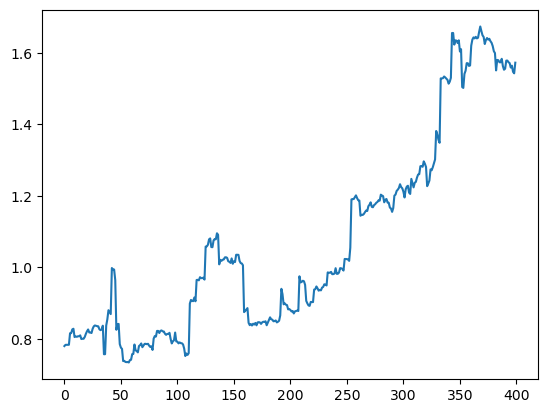

In [680]:
plt.plot(nn_sa.fitness_curve[:,0])


## fitness by iterations

In [731]:
train_acc_sa3 = []
val_acc_sa3 = []
time_iter3 = []
import time
schedule = mlrose.ExpDecay(init_temp=1,exp_const=5e-3)
for i in range(0,8000,40):
    print(i)
    start_time = time.time()
    nn_sa = mlrose.NeuralNetwork(hidden_nodes = [64], activation = 'sigmoid', \
                                 algorithm = 'simulated_annealing',  \
                                 bias = True, is_classifier = True, learning_rate = 1, \
                                 early_stopping = True, clip_max = 1e8, max_attempts = 10, max_iters= i, \
                                 random_state = 75,curve=True, schedule=    schedule)
   
    nn_sa.fit(X_train,y_train)
    time_iter3.append(time.time() - start_time)
    y_pred_train = nn_sa.predict(X_train)
    y_pred = nn_sa.predict(X_val)
    train_acc_sa3.append(accuracy_score(y_train,y_pred_train))
    val_acc_sa3.append(accuracy_score(y_val,y_pred))

0
40
80
120
160
200
240
280
320
360
400
440
480
520
560
600
640
680
720
760
800
840
880
920
960
1000
1040
1080
1120
1160
1200
1240
1280
1320
1360
1400
1440
1480
1520
1560
1600
1640
1680
1720
1760
1800
1840
1880
1920
1960
2000
2040
2080
2120
2160


KeyboardInterrupt: 

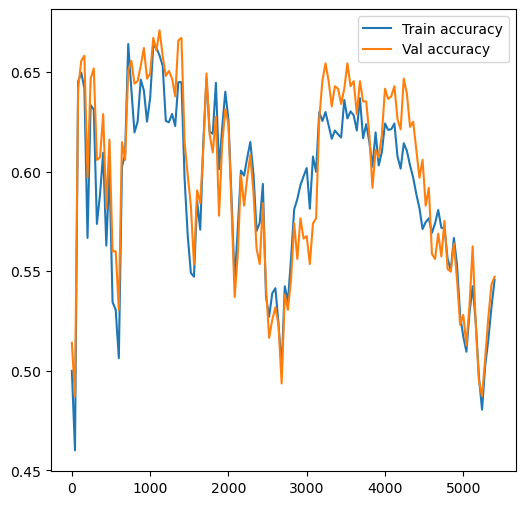

In [724]:
fig, ax = plt.figure(figsize=(6,6)),plt.axes()
ax.plot([i for i in range(0,5430,40)],train_acc_sa[:],label='Train accuracy')
ax.plot([i for i in range(0,5430,40)],val_acc_sa[:],label='Val accuracy')
ax.legend()

ValueError: x and y must have same first dimension, but have shapes (50,) and (0,)

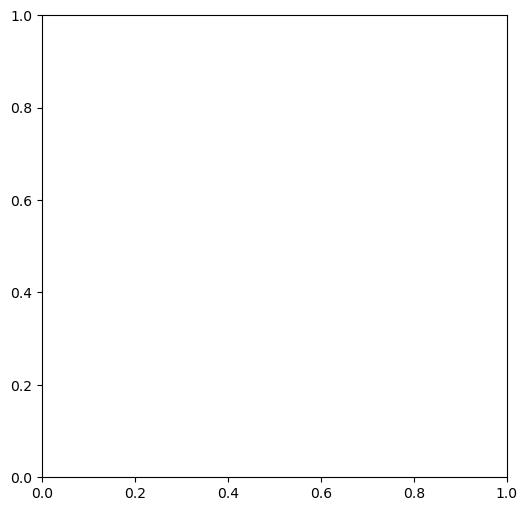

In [808]:
fig, ax = plt.figure(figsize=(6,6)),plt.axes()
ax.plot([i for i in range(0,2000,40)],train_acc_sa2[:],label='Train accuracy')
ax.plot([i for i in range(0,2000,40)],val_acc_sa2[:],label='Val accuracy')
ax.legend()

TypeError: 'Axes' object is not subscriptable

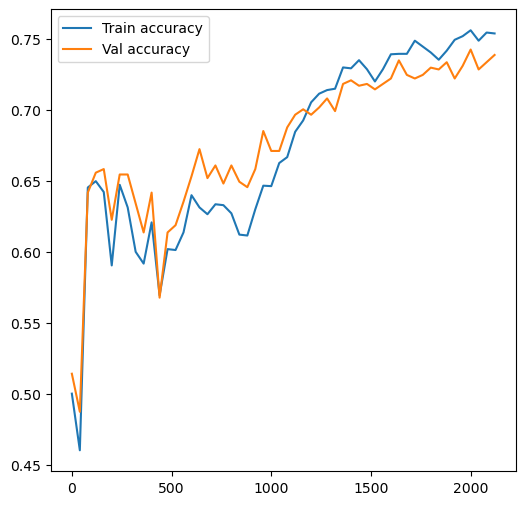

In [804]:
fig, ax = plt.figure(figsize=(6,6)),plt.axes()
ax.plot([i for i in range(0,2160,40)],train_acc_sa3[:],label='Train accuracy')
ax.plot([i for i in range(0,2160,40)],val_acc_sa3[:],label='Val accuracy')
ax.legend()

ax[1].plot([i for i in range(0,2160,40)],train_acc_sa3[:],label='Train accuracy')
ax[1].plot([i for i in range(0,2160,40)],val_acc_sa3[:],label='Val accuracy')
ax.legend()

ax[2].plot([i for i in range(0,2000,40)],train_acc_sa2[:],label='Train accuracy')
ax[2].plot([i for i in range(0,2000,40)],val_acc_sa2[:],label='Val accuracy')
ax.legend()

ValueError: x and y must have same first dimension, but have shapes (50,) and (0,)

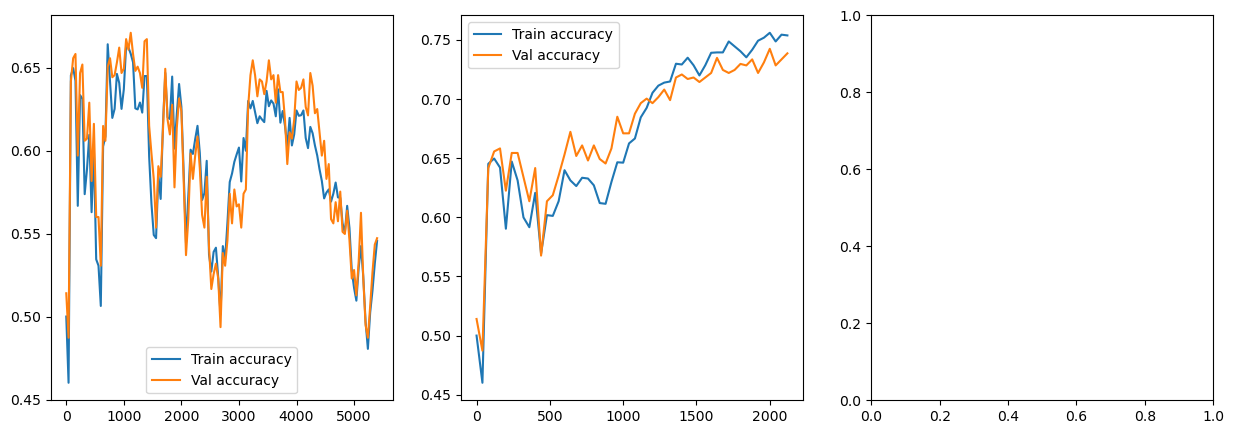

In [807]:
fig, ax = plt.subplots(1,3, figsize=(15,5))

ax[0].plot([i for i in range(0,5430,40)],train_acc_sa[:],label='Train accuracy')
ax[0].plot([i for i in range(0,5430,40)],val_acc_sa[:],label='Val accuracy')
ax[0].legend()


ax[1].plot([i for i in range(0,2160,40)],train_acc_sa3[:],label='Train accuracy')
ax[1].plot([i for i in range(0,2160,40)],val_acc_sa3[:],label='Val accuracy')
ax[1].legend()

ax[2].plot([i for i in range(0,2000,40)],train_acc_sa2[:],label='Train accuracy')
ax[2].plot([i for i in range(0,2000,40)],val_acc_sa2[:],label='Val accuracy')

ax[2].legend()

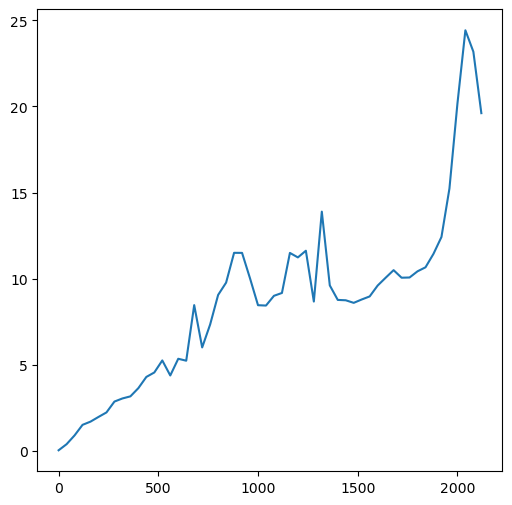

In [739]:
#plot time per iteration
fig, ax = plt.figure(figsize=(6,6)),plt.axes()
ax.plot([i for i in range(0,2160,40)],time_iter3[:],label='Time per iteration')

## Learning curve SA

In [863]:
train_acc_lc_sa = []
val_acc_lc_sa = []
schedule = mlrose.ExpDecay(init_temp=1,exp_const=5e-2)

for sample in np.linspace(0.01,0.99,50):
    X_train_sample,X_out_sample,y_train_sample,y_out_sample = train_test_split(X_train,y_train,test_size=float(1 - sample),random_state=random_state)
    
    nn_sa_lc = mlrose.NeuralNetwork(hidden_nodes = [64], activation = 'sigmoid', \
                                 algorithm = 'simulated_annealing',  \
                                 bias = True, is_classifier = True, learning_rate = 1, \
                                 early_stopping = True, clip_max = 1e8, max_attempts = 10, max_iters= 1500, \
                                 random_state = 75,curve=True, schedule=    schedule)
    nn_sa_lc.fit(X_train_sample,y_train_sample)
    
    y_pred_train = nn_sa_lc.predict(X_train_sample)
    train_acc_lc_sa.append(accuracy_score(y_train_sample,y_pred_train))
    val_acc_lc_sa.append(accuracy_score(y_val,nn_sa_lc.predict(X_val)))
    

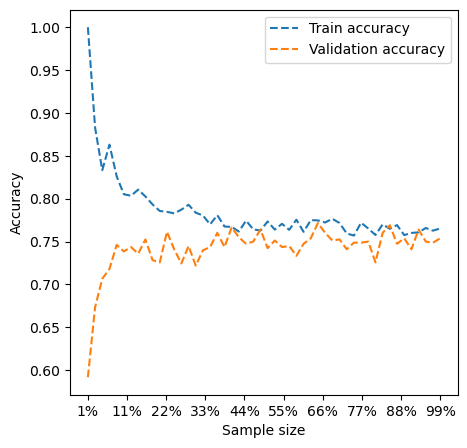

In [865]:
fig, ax = plt.subplots(figsize=(5,5))

ax.plot(np.linspace(0.01,0.99,50),train_acc_lc_sa,label='Train accuracy',linestyle='--')
##With dashed line

ax.plot(np.linspace(0.01,0.99,50),val_acc_lc_sa,label='Validation accuracy',linestyle='--')

ax.set_xlabel('Sample size')
ax.set_ylabel('Accuracy')
#x_tick as percentage
ax.set_xticks(np.linspace(0.01,0.99,10))
ax.set_xticklabels([str(int(i*100))+'%' for i in np.linspace(0.01,0.99,10)])
ax.legend()
plt.show()

Score on test

In [875]:
schedule = mlrose.ExpDecay(init_temp=1,exp_const=5e-2)
nn_sa = mlrose.NeuralNetwork(hidden_nodes = [64], activation = 'sigmoid', \
                                 algorithm = 'simulated_annealing',  \
                                 bias = True, is_classifier = True, learning_rate = 1, \
                                 early_stopping = True, clip_max = 1e8, max_attempts = 10, max_iters= 400, \
                                 random_state = 75,curve=True, schedule=    schedule)

nn_sa.fit(X_train,y_train)
#score on test set
y_pred = nn_sa.predict(X_test)
print('Test Accuracy and F1 : ',accuracy_score(y_test,y_pred),f1_score(y_test,y_pred))



Test Accuracy and F1 :  0.7326530612244898 0.8053491827637442


## GA grid search

In [823]:


grid= {
    "max_iters": [10],
    "max_attempt": [1],
    "learning_rate_init": [0.01, 0.1, 1],
    "hidden_layer_sizes":  [[64]], 
    "activation": [mlrose.sigmoid],
    "mutation_prob": [0.1,0.2,0.3],
    "is_classifier": [True],
    "pop_size": [20,50,75],
}



runner = mlrose.NNGSRunner(x_train=X_train, y_train=y_train,x_test=X_val, y_test=y_val,
                           experiment_name="nn_test", output_directory="nn_test/",
                           algorithm=mlrose.algorithms.genetic_alg,
                           grid_search_parameters=grid,
                           iteration_list = [10],
                           
                           bias=True,
                           early_stopping=True,
                           clip_max= 100,
                           max_attempts=100,
                           generate_curves=True,
                           seed= 75,
                           n_jobs=-1,
                           cv = 2,
                           grid_search_scorer_method=accuracy_score)


              
run_stats_ga, curves_ga, cv_results_ga, best_est_ga = runner.run()

Fitting 2 folds for each of 27 candidates, totalling 54 fits


In [824]:
best_est_ga.best_params_,best_est_ga.best_score_

({'activation': <function mlrose_hiive.neural.activation.sigmoid.sigmoid(x, deriv=False)>,
  'hidden_layer_sizes': [64],
  'is_classifier': True,
  'learning_rate_init': 0.01,
  'max_attempt': 1,
  'max_iters': 10,
  'mutation_prob': 0.2,
  'pop_size': 75},
 0.7077217613273772)

In [828]:
nn_ga = mlrose.NeuralNetwork(hidden_nodes = [64], activation = 'sigmoid', \
                                 algorithm = 'genetic_alg',  \
                                 bias = True, is_classifier = True, learning_rate = 1, \
                                 early_stopping = True, clip_max = 1e8, max_attempts = 3, max_iters= 10, \
                                 random_state = 75,curve=True,mutation_prob=0.1,pop_size=200)

nn_ga.fit(X_train,y_train)

y_pred = nn_ga.predict(X_val)
y_pred_train = nn_ga.predict(X_train)

print('Train Accuracy and F1: ',accuracy_score(y_train,y_pred_train),f1_score(y_train,y_pred_train))
print('Val  Accuracy and F1 : ',accuracy_score(y_val,y_pred),f1_score(y_val,y_pred))


Train Accuracy and F1:  0.7089980855137205 0.8061224489795918
Val  Accuracy and F1 :  0.6760204081632653 0.788685524126456


## fitness by iterations

In [850]:
train_acc_ga = []
val_acc_ga = []

for i in range(1,2):

    nn_ga = mlrose.NeuralNetwork(hidden_nodes = [64], activation = 'sigmoid', \
                                 algorithm = 'genetic_alg',  \
                                 bias = True, is_classifier = True, learning_rate = 1, \
                                 early_stopping = True, clip_max = 1e8, max_iters = i, \
                                 random_state = 75,curve=True,mutation_prob=0.2,pop_size=200)
    nn_ga.fit(X_train,y_train)
    y_pred_train = nn_ga.predict(X_train)
    y_pred = nn_ga.predict(X_val)
    train_acc_ga.append(accuracy_score(y_train,y_pred_train))
    val_acc_ga.append(accuracy_score(y_val,y_pred))

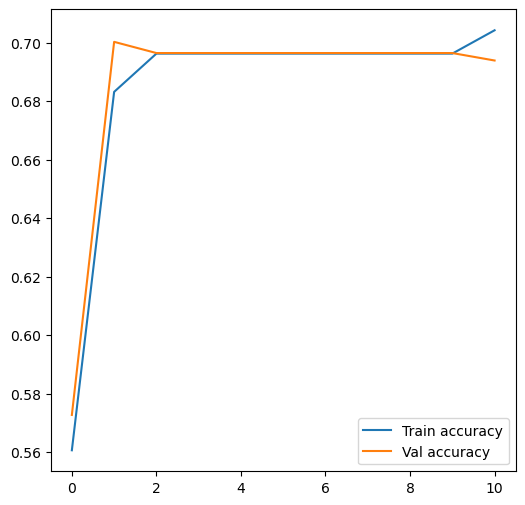

In [838]:
fig, ax = plt.figure(figsize=(6,6)),plt.axes()
ax.plot([i for i in range(0,11)],train_acc_ga,label='Train accuracy')
ax.plot([i for i in range(0,11)],val_acc_ga,label='Val accuracy')
ax.legend()

In [851]:
train_acc_ga50 = []
val_acc_ga50 = []

for i in range(1,2):

    nn_ga = mlrose.NeuralNetwork(hidden_nodes = [64], activation = 'sigmoid', \
                                 algorithm = 'genetic_alg',  \
                                 bias = True, is_classifier = True, learning_rate = 1, \
                                 early_stopping = True, clip_max = 1e8, max_iters = i, \
                                 random_state = 75,curve=True,mutation_prob=0.2,pop_size=50)
    nn_ga.fit(X_train,y_train)
    y_pred_train = nn_ga.predict(X_train)
    y_pred = nn_ga.predict(X_val)
    train_acc_ga50.append(accuracy_score(y_train,y_pred_train))
    val_acc_ga50.append(accuracy_score(y_val,y_pred))

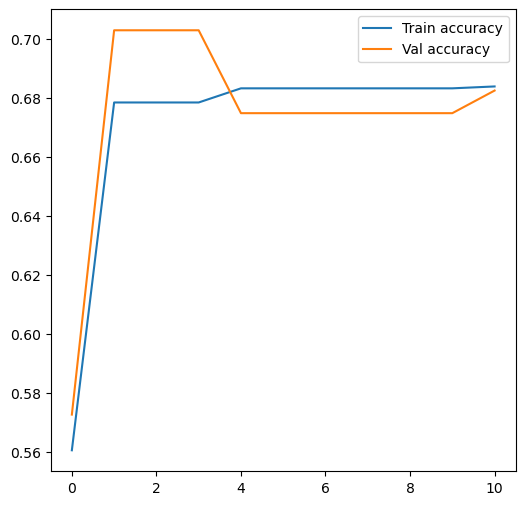

In [840]:
fig, ax = plt.figure(figsize=(6,6)),plt.axes()
ax.plot([i for i in range(0,11)],train_acc_ga50,label='Train accuracy')
ax.plot([i for i in range(0,11)],val_acc_ga50,label='Val accuracy')
ax.legend()

##plot same graph

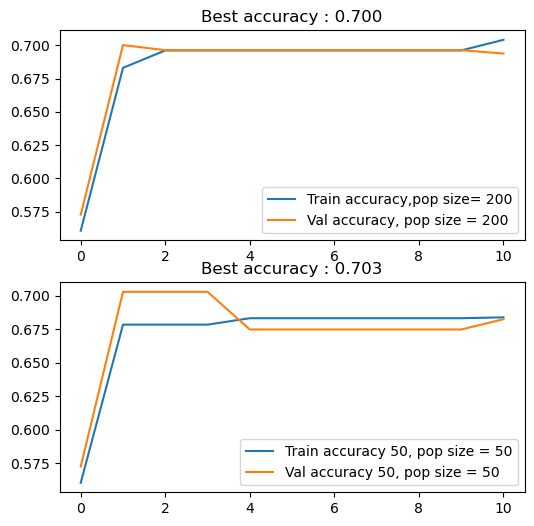

In [849]:
##Plot two curves on the same graph
fig, ax = plt.subplots(2,1,figsize=(6,6))
ax[0].plot([i for i in range(0,11)],train_acc_ga,label='Train accuracy,pop size= 200')
ax[0].plot([i for i in range(0,11)],val_acc_ga,label='Val accuracy, pop size = 200')
ax[1].plot([i for i in range(0,11)],train_acc_ga50,label='Train accuracy 50, pop size = 50')
ax[1].plot([i for i in range(0,11)],val_acc_ga50,label='Val accuracy 50, pop size = 50')
ax[1].set_title('Best accuracy : {:.3f}'.format(max(val_acc_ga50)))
ax[0].set_title('Best accuracy : {:.3f}'.format(max(val_acc_ga)))
ax[0].legend()
ax[1].legend()

## Learning curve GA

In [860]:
train_acc_lc_ga = []
val_acc_lc_ga = []


for sample in np.linspace(0.01,0.99,50):
    X_train_sample,X_out_sample,y_train_sample,y_out_sample = train_test_split(X_train,y_train,test_size=float(1 - sample),random_state=random_state)
    
    nn_ga_lc = mlrose.NeuralNetwork(hidden_nodes = [64], activation = 'sigmoid', \
                                 algorithm = 'genetic_alg',  \
                                 bias = True, is_classifier = True, learning_rate = 1, \
                                 early_stopping = True, clip_max = 1e8, max_attempts = 10, max_iters= 1, \
                                 random_state = 75,curve=True)
    nn_ga_lc.fit(X_train_sample,y_train_sample)
    
    y_pred_train = nn_ga_lc.predict(X_train_sample)
    train_acc_lc_ga.append(accuracy_score(y_train_sample,y_pred_train))
    val_acc_lc_ga.append(accuracy_score(y_val,nn_ga_lc.predict(X_val)))

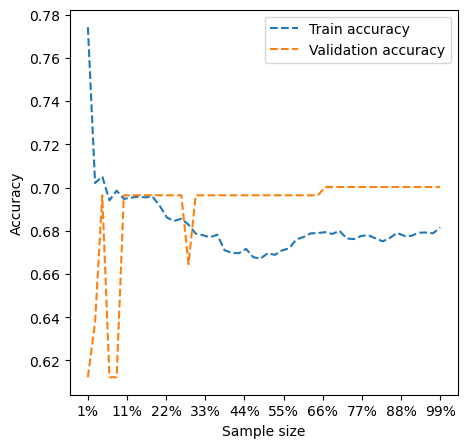

In [872]:
fig, ax = plt.subplots(figsize=(5,5))

ax.plot(np.linspace(0.01,0.99,50),train_acc_lc_ga,label='Train accuracy',linestyle='--')
##With dashed line

ax.plot(np.linspace(0.01,0.99,50),val_acc_lc_ga,label='Validation accuracy',linestyle='--')

ax.set_xlabel('Sample size')
ax.set_ylabel('Accuracy')
#x_tick as percentage
ax.set_xticks(np.linspace(0.01,0.99,10))
ax.set_xticklabels([str(int(i*100))+'%' for i in np.linspace(0.01,0.99,10)])
ax.legend()
plt.show()

## Ga

In [884]:
nn_ga = mlrose.NeuralNetwork(hidden_nodes = [64,64], activation = 'sigmoid', \
                                 algorithm = 'genetic_alg',  \
                                 bias = True, is_classifier = True, learning_rate = 1, \
                                 early_stopping = True, clip_max = 5, max_attempts = 2,max_iters=8, \
                                 random_state = 75,curve=True,mutation_prob=0.4,pop_size=50)

nn_ga.fit(X_train,y_train)

#score on test set
y_pred = nn_ga.predict(X_test)

In [885]:
accuracy_score(y_test,y_pred)

0.6193877551020408

In [450]:
from sklearn.metrics import f1_score,accuracy_score
y_pred = nn_ga.predict(X_val).flatten()
y_pred_train = nn_ga.predict(X_train).flatten()
print('train f1: ',f1_score(y_train,y_pred_train))
print('Validation f1: ',f1_score(y_val,y_pred))

print('train accuracy: ',accuracy_score(y_train,y_pred_train))
print('Validation accuracy: ',accuracy_score(y_val,y_pred))

train f1:  0.3628048780487805
Validation f1:  0.3631123919308357
train accuracy:  0.7332482450542438
Validation accuracy:  0.7181122448979592


In [184]:
#import F1 score
from sklearn.metrics import f1_score
accuracy_score(y_train.flatten(),y_pred.flatten())

0.6914486279514996

In [176]:
nn_model1.fitness_curve

[]